In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels
import statsmodels.api as sm

In [141]:
car= pd.read_csv('cardekho_data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [142]:
# shape and size of the dataset 
car.shape

(301, 9)

In [143]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [144]:
# checking data types
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [145]:
# more information about the dataset 
car.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [146]:
#checking if there are null values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [147]:
# checking the unique values 
car['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [148]:
#transforming the categorical data: 
car.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)
car.replace({'Transmission' : {'Manual': 0, 'Automatic':1}}, inplace=True)
car.replace({'Seller_Type' : {'Dealer': 0, 'Individual':1}}, inplace=True)

In [149]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [150]:
X = car.drop(['Car_Name','Selling_Price'], axis=1)
Y = car['Selling_Price']

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)


In [152]:
# Multiple Linear Regressionmlr_model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [153]:
training_data_prediction= model.predict(X_train)

In [154]:
error_score= metrics.r2_score(Y_train, training_data_prediction)
error_score

0.8799451660493698

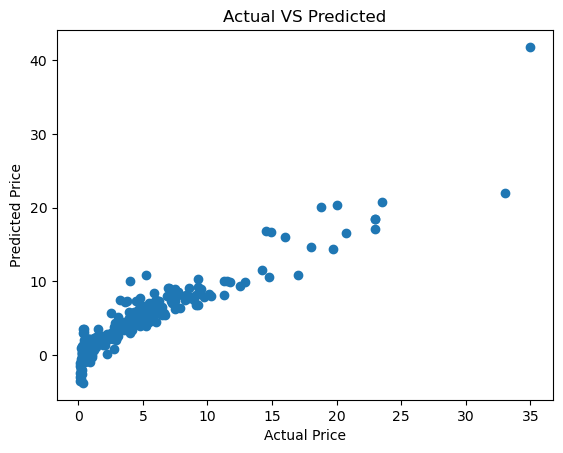

In [155]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted')
plt.show()

In [156]:
test_data_prediction= model.predict(X_test)
error_score= metrics.r2_score(Y_test, test_data_prediction)
error_score

0.8365766715026905

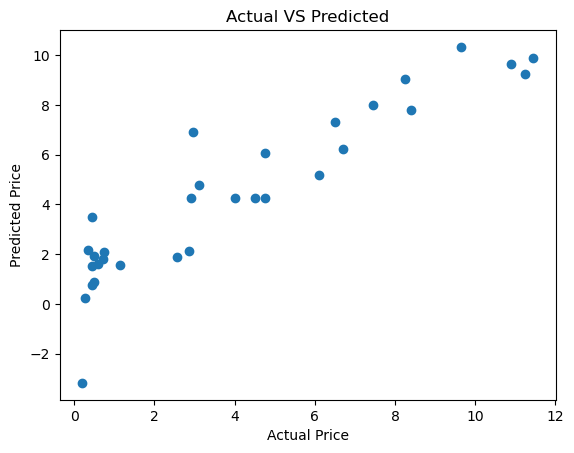

In [157]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted')
plt.show()

In [158]:
X= sm.add_constant(X)

res = sm.OLS(Y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          4.43e-130
Time:                        15:16:41   Log-Likelihood:                -598.73
No. Observations:                 301   AIC:                             1213.
Df Residuals:                     293   BIC:                             1243.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -811.9944     87.537     -9.276

In [159]:
#feature importance 
feature_importance = model.coef_
feature_importance

array([ 4.09426126e-01,  4.38728846e-01, -6.73100388e-06,  1.76308349e+00,
       -1.00417660e+00,  1.50736348e+00, -8.74133473e-01])

In [160]:
# Comparing models using Sum of Squared Error
model_prediction = model.predict(X_test)
sse_model = mean_squared_error(Y_test, model_prediction)
print('sum of squared errors:')
print(f"{sse_model}")

sum of squared errors:
2.1501299189838208


In [161]:
print("Model Coefficients:")
print(dict(zip(X.columns, model.coef_)))
print("\nIntercept:", model.intercept_)
print("\nR-squared Score (Training):", model.score(X_train, Y_train))
print("R-squared Score (Testing):", model.score(X_test, Y_test))

Model Coefficients:
{'const': 0.4094261264165447, 'Year': 0.4387288463768019, 'Present_Price': -6.731003883737211e-06, 'Kms_Driven': 1.7630834930108905, 'Fuel_Type': -1.004176595831012, 'Seller_Type': 1.5073634813630599, 'Transmission': -0.8741334726419552}

Intercept: -823.0159622136593

R-squared Score (Training): 0.8799451660493698
R-squared Score (Testing): 0.8365766715026905


In [162]:
model.fit(X, Y)
# Display the coefficients (feature importance)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.append({'Feature': 'Intercept', 'Coefficient': model.intercept_}, ignore_index=True)

# Display feature importance
print("Feature Importance:")
print(feature_importance)




Feature Importance:
         Feature  Coefficient
0          const     0.000000
1           Year     0.403947
2  Present_Price     0.445987
3     Kms_Driven    -0.000006
4      Fuel_Type     1.492988
5    Seller_Type    -1.103679
6   Transmission     1.430417
7          Owner    -0.680557
8      Intercept  -811.994364


C:\Users\ADhiRAJ\AppData\Local\Temp\ipykernel_8464\1086289689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance = feature_importance.append({'Feature': 'Intercept', 'Coefficient': model.intercept_}, ignore_index=True)


In [163]:
y_pred = model.predict(X_test)

# Residuals vs. Fitted Values Plot
residuals = Y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residuals vs. Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- const


In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()